In [18]:

from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
_URL = 'HTTPS://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin = _URL, extract =True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


In [21]:
PATH +"/train"

'C:\\Users\\USER\\.keras\\datasets\\cats_and_dogs_filtered/train'

In [ ]:
PATH = 'YOUR NEW FOLDER/cats_and_dogs_filtered'

In [22]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH, 'validation')

In [23]:
train_cats_dir = os. path.join(train_dir, 'cats')
train_dogs_dir = os.path. join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [24]:
num_cats_tr = len(os.listdir (train_cats_dir))
num_dogs_tr = len(os.listdir (train_dogs_dir))
num_cats_val = len(os.listdir (validation_cats_dir))
num_dogs_val = len(os.listdir (validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val+num_dogs_val

In [26]:
print('total training cat images:', num_cats_tr)
print ('total training dog images:', num_dogs_tr)

print( 'total validation cat images:', num_cats_val)
print ('total validation dog images:', num_dogs_val)
print ("--")
print ("Total training images:", total_train) 
print ("Total validation images:",total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [63]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 180
IMG_WIDTH = 150

In [28]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale= 1./255)


In [30]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory = train_dir, shuffle=True, target_size={IMG_HEIGHT,IMG_WIDTH},class_mode='binary')

Found 2000 images belonging to 2 classes.


In [31]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory = validation_dir, target_size={IMG_HEIGHT,IMG_WIDTH},class_mode='binary')

Found 1000 images belonging to 2 classes.


In [32]:
sample_training_images, _=next(train_data_gen)

In [40]:
def plotImages (images_arr):
     fig, axes = plt.subplots (1, 5, figsize=(20,20))
     axes = axes. flatten()
     for img, ax in zip( images_arr, axes):
       ax. imshow(img)
       ax. axis ('off')
     plt.tight_layout()
     plt.show()

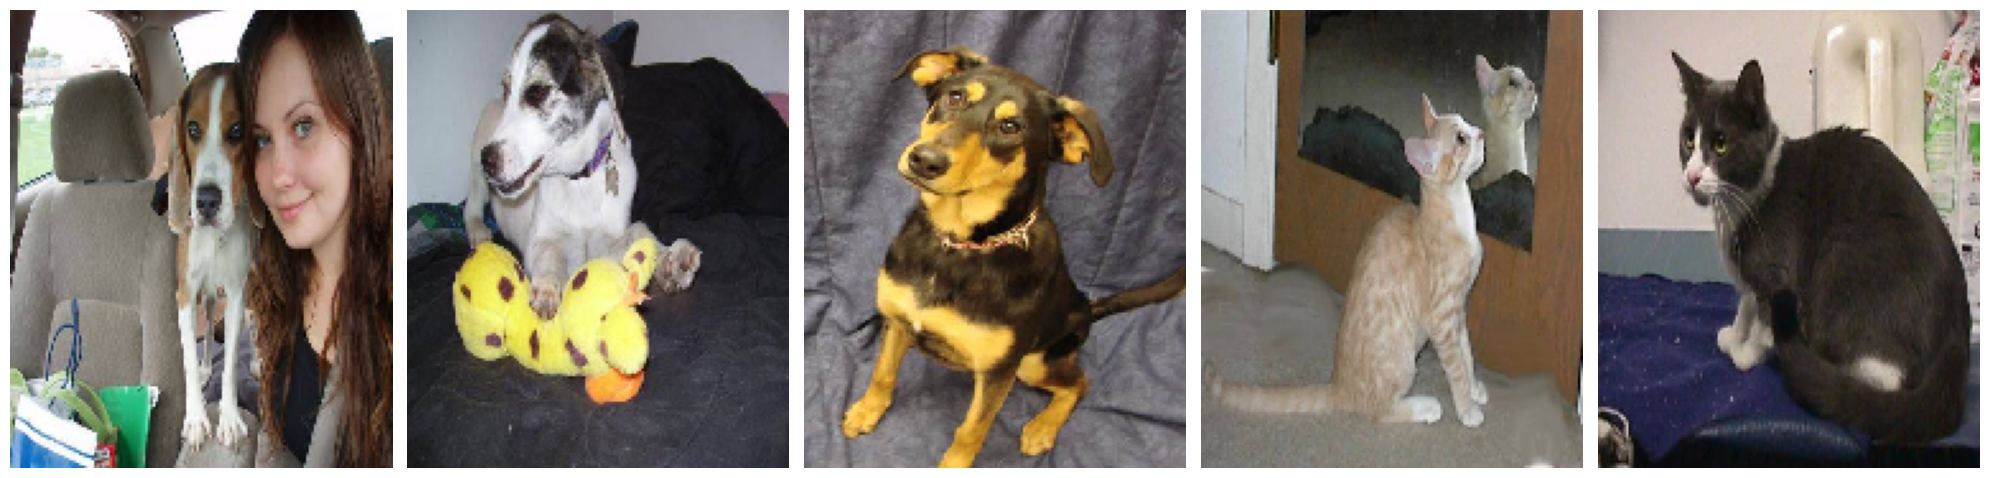

In [41]:
plotImages(sample_training_images[:5])

In [46]:
model =Sequential ([
    Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),  
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu' ),
    MaxPooling2D(),
    Flatten(),
    Dense (512, activation= 'relu'), 
    Dense (1, activation='sigmoid') 
    ])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [47]:
model.compile(optimizer= 'adam',
               loss = 'binary_crossentropy',
               metrics =['accuracy'])

In [48]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5116 - loss: 1.3453 - val_accuracy: 0.5446 - val_loss: 0.6924
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 13s 941ms/step - accuracy: 0.5312 - loss: 0.6926

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5312 - loss: 0.3694 - val_accuracy: 0.4615 - val_loss: 0.3465
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5608 - loss: 0.6917 - val_accuracy: 0.5781 - val_loss: 0.6837
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5312 - loss: 0.3663 - val_accuracy: 0.5673 - val_loss: 0.3391
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5856 - loss: 0.6694 - val_accuracy: 0.6217 - val_loss: 0.6688
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7344 - loss: 0.3465 - val_accuracy: 0.7404 - val_loss: 0.3280
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6747 - loss: 0.6378 - val_accuracy: 0.5993 - val_loss: 0.6408
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6484 - loss: 0.3249 - val_accuracy: 0.7019 - val_loss: 0.3106
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7007 - loss: 0.5766 - val_accuracy: 0.6920 - val_loss: 0.5805

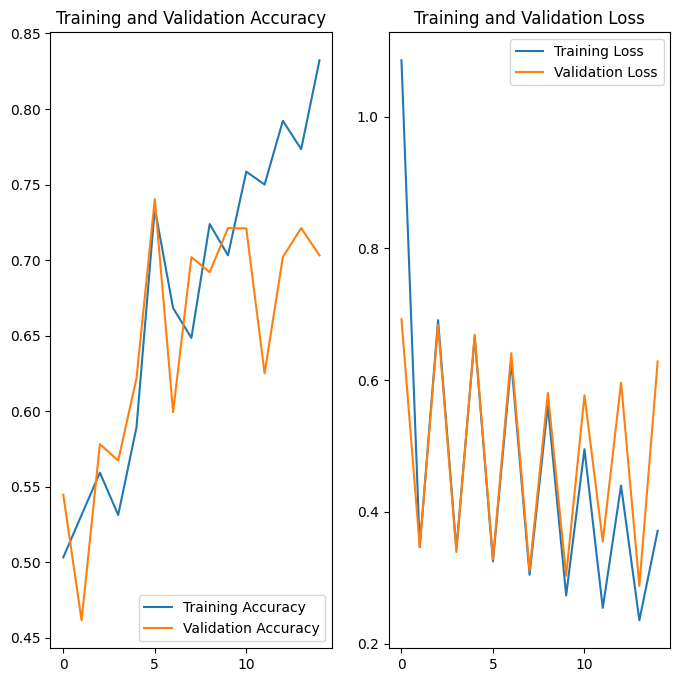

In [62]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs_range =  range(epochs)

plt.figure (figsize = (8, 8))
plt.subplot (1, 2, 1)
plt.plot (epochs_range, acc, label= 'Training Accuracy') 
plt.plot (epochs_range, val_acc, label= 'Validation Accuracy')
plt.legend (loc= 'lower right')
plt.title('Training and Validation Accuracy')
plt.subplot (1, 2, 2)
plt.plot (epochs_range, loss, label= 'Training Loss') 
plt.plot (epochs_range, val_loss, label = 'Validation Loss')
plt.legend (loc= 'upper right')
plt.title ('Training and Validation Loss')
plt.show()